# DATA VISUALIZATION of RAMEN RATINGS

##### For details visit here - https://www.kaggle.com/residentmario/ramen-ratings/

In [2]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline


In [3]:
dataframe = pd.read_csv('ramen-ratings.csv')
dataframe


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [7]:
#checking total number of rows and columns in our data
dataframe.shape


(2580, 7)

## As we can see, there are seven columns in our dataset

- #### *Review* - Unique numbers that inform the review order from the latest- 
- #### *Brand*  - Ramen Brand
- #### *Variety* - Variety of Ramen
- #### *Style*  - Style of Ramen
- #### *Country* - Country where the Ramen is availaible
- #### *Stars*  - Ratings
- #### *Top Ten* - Is it among the top 10 popular ramens ? 

In [9]:
dataframe.isna().sum()


Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

- #### It was expected to have large number of blank values in 'Top Ten' column. 
- #### In style column, only two values are missing. As the number is very small, we can drop them.


In [11]:
dataframe = dataframe.dropna(subset=['Style'])
dataframe

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [12]:
(dataframe.shape) # Number of rows reduced by 2


(2578, 7)


In [14]:
dataframe.isna().sum() # No blank value in 'Style' column

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
Top Ten     2537
dtype: int64

## Frequency Analysis

- ### Style

In [16]:
dataframe['Style'].unique() # Unique styles of Ramen

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

#### *Let's count the number of each styles*

In [17]:


dataframe['Style'].value_counts()



Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

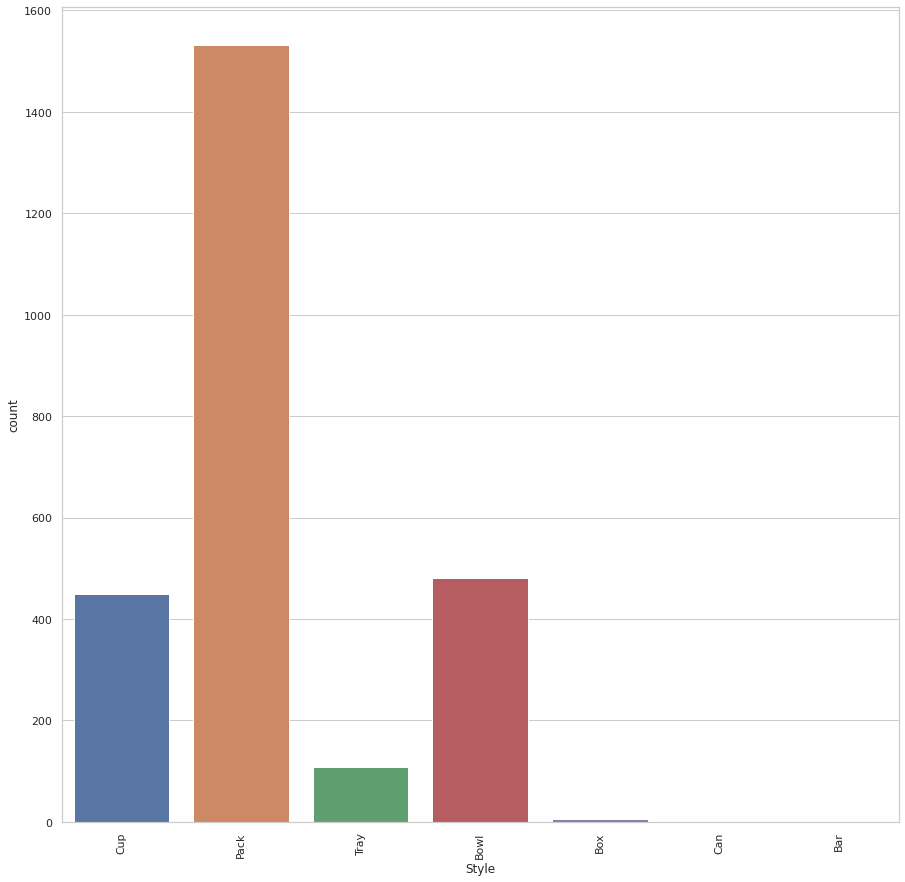

In [82]:
# Visualising the data in bar plot
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1,1,figsize = (15,15))
sns.countplot(x = 'Style', data = dataframe)
plt.xticks(rotation=90)
plt.show()

### Pack style is the most used style

- ### Country


In [18]:
dataframe['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [184]:
# Replacing some countries with their full form
dataframe['Country'] = dataframe['Country'].replace('UK', 'United Kingdom')


# Some countries are written with their older names
dataframe['Country'] = dataframe['Country'].replace('Holland', 'Netherlands')

# Some cities are also mentioned along with country names
dataframe['Country'] = dataframe['Country'].replace('Sarawak', 'Malaysia')
dataframe['Country'] = dataframe['Country'].replace('Dubai', 'United Arab Emirates')

#### *Using value_counts( )*

In [185]:
dataframe['Country'].value_counts() #To check in which country Ramen is most popular

Japan                   352
USA                     323
South Korea             309
Taiwan                  223
Thailand                191
China                   168
Malaysia                159
Hong Kong               137
Indonesia               126
Singapore               109
Vietnam                 108
United Kingdom           69
Philippines              47
Canada                   41
India                    31
Germany                  27
Mexico                   25
Australia                22
Netherlands              19
Nepal                    14
Myanmar                  14
Pakistan                  9
Hungary                   9
Bangladesh                7
Colombia                  6
Cambodia                  5
Brazil                    5
Fiji                      4
Poland                    4
Sweden                    3
Finland                   3
United Arab Emirates      3
Estonia                   2
Ghana                     2
United States             1
Nigeria             

 ### Japan has long history with instant noodles and it's one of nation's favourite food. It isn't surprising that Japan is at the top.

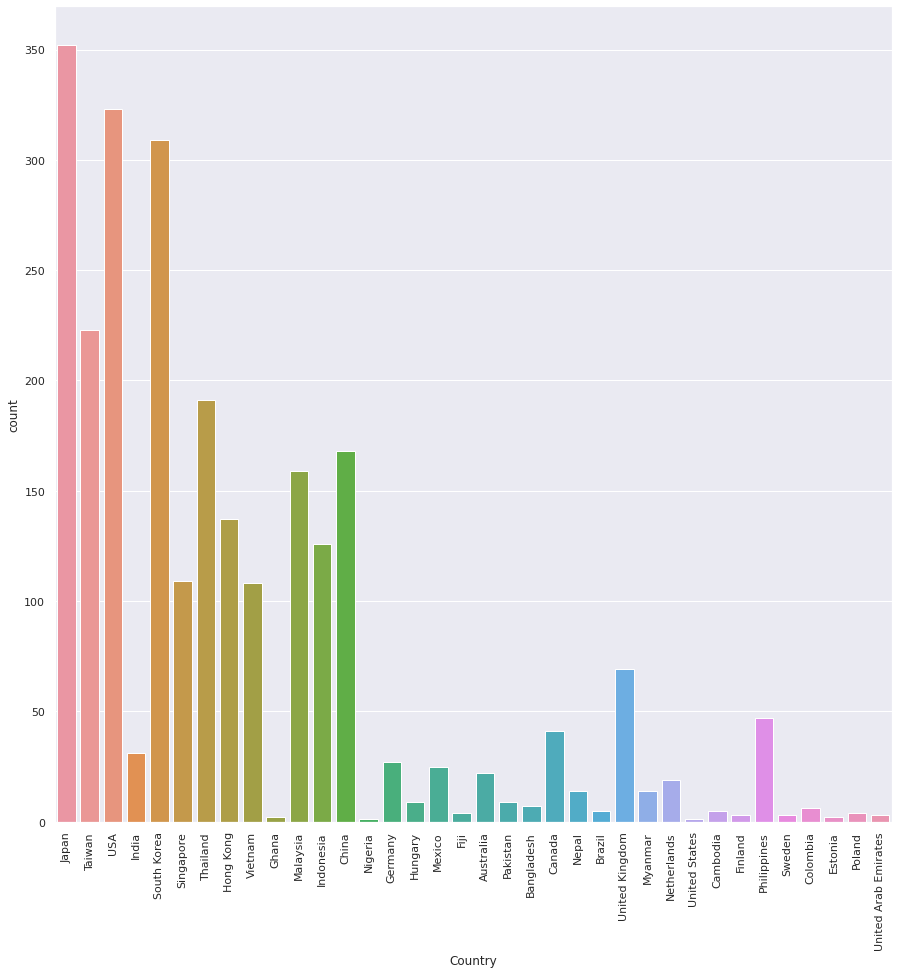

In [206]:
# Visualising the data in bar plot
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (15,15))
sns.countplot(x = 'Country', data = dataframe)
plt.xticks(rotation=90)

plt.show()

- ### Top 10 Ramen 

Let's have a look at Top 10 Ramens

In [86]:
top10 = dataframe.copy()
top10 = top10.dropna(subset=['Top Ten']).copy()
top10

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9


We can see that there are some anomalies in the dataset. We found '\n' or newline in our data. Let's filter it.

In [87]:


top10 = top10[top10['Top Ten'] != '\n'] #if the data in Top Ten column contains '\n' we can ignore it
top10 = top10.sort_values('Top Ten' ) #and we sort it by year
top10



,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5,2012 #1
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5,2012 #10
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5,2012 #2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5,2012 #3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012 #4
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.5,2012 #5
2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012 #6
2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012 #7
2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.5,2012 #9
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5,2013 #1


### Which brands have come in Top 10 most number of times ?
### Let's find it.

In [89]:
top10['Brand'].value_counts()

Prima Taste         5
Nongshim            3
MyKuali             3
Indomie             3
Mama                3
Sapporo Ichiban     2
Mamee               2
Paldo               2
Myojo               2
Samyang Foods       1
Doll                1
MAMA                1
CarJEN              1
Nissin              1
Mi Sedaap           1
Koka                1
Maruchan            1
A-Sha Dry Noodle    1
Wugudaochang        1
Tseng Noodles       1
Prima               1
Name: Brand, dtype: int64

##### Prima and Prima Taste refer to the same brand - https://www.primataste.com/

##### Let us replace all the 'Prima' by 'Prima Test' in our top10 dataframe.

In [111]:
top10['Brand']= top10['Brand'].replace('Prima','Prima Taste')


In [114]:
top10['Brand'].value_counts()

Prima Taste         6
MyKuali             3
Indomie             3
Nongshim            3
Mama                3
Paldo               2
Myojo               2
Sapporo Ichiban     2
Mamee               2
Koka                1
Tseng Noodles       1
A-Sha Dry Noodle    1
MAMA                1
Mi Sedaap           1
Wugudaochang        1
Samyang Foods       1
Doll                1
Nissin              1
Maruchan            1
CarJEN              1
Name: Brand, dtype: int64

### Prima Taste brand has come in top 10 most number of times

- ### Top Brands by rating

In [155]:
top_rating = dataframe.copy()
top_rating['Brand']= top_rating['Brand'].replace('Prima','Prima Taste')

In [156]:
top_rating = top_rating.sort_values('Stars',ascending = False)

In [157]:
top_rating

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN
454,2126,Nissin,Mennippon Oumi Chanpon,Bowl,Japan,5.00,NaN
585,1995,Nissin,Cup Noodle Big Cheese Mexican Chilli,Cup,Japan,5.00,NaN
...,...,...,...,...,...,...,...
667,1913,Thai Smile,Mushroom Rice Noodle Soup Bowl,Bowl,USA,0,NaN
77,2503,Sichuan Guangyou,Sweet Potato Instant Noodle Sout-Hot Flavor,Bowl,China,0,NaN
707,1873,Vedan,Wei Wei A Instant Noodles Chicken Flavor,Bowl,Taiwan,0,NaN
53,2527,Uni-President,Mushroom Flavor,Pack,Vietnam,0,NaN


Let's remove the Unrated Data

In [158]:
top_rating = top_rating[top_rating['Stars']!='Unrated']
top_rating

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
454,2126,Nissin,Mennippon Oumi Chanpon,Bowl,Japan,5.00,NaN
585,1995,Nissin,Cup Noodle Big Cheese Mexican Chilli,Cup,Japan,5.00,NaN
383,2197,Mr. Lee's Noodles,Hong Kong Street Beef,Cup,UK,5.00,NaN
603,1977,MyOri,Malaysia Penang Green Curry Vermicelli (New Pa...,Pack,Malaysia,5.00,NaN
591,1989,MyKuali,Penang White curry Noodle Authentic Taste,Pack,Malaysia,5.00,NaN
...,...,...,...,...,...,...,...
667,1913,Thai Smile,Mushroom Rice Noodle Soup Bowl,Bowl,USA,0,NaN
77,2503,Sichuan Guangyou,Sweet Potato Instant Noodle Sout-Hot Flavor,Bowl,China,0,NaN
707,1873,Vedan,Wei Wei A Instant Noodles Chicken Flavor,Bowl,Taiwan,0,NaN
53,2527,Uni-President,Mushroom Flavor,Pack,Vietnam,0,NaN


### Let's look at top 50 Rated brands

In [159]:
top_rating = dataframe.copy()
top_rating = top_rating.sort_values('Stars',ascending = False)
top_rating = top_rating[top_rating['Stars']!='Unrated']

In [160]:
brands = list(top_rating['Brand'].unique())
counter = [0.0]*355

brands_cnt = dict(zip(brands, counter)) #create dictionary to count all ratings and then save the averages

for brand in brands:
    brands_data = top_rating[top_rating['Brand'] == brand]
    for star in brands_data['Stars']:
        brands_cnt[brand] += float(star) #count all ratings
    brands_cnt[brand] /= len(brands_data) #average

In [161]:
top50ratings = [] #list for saving the brand name and its average rating
for key, values in brands_cnt.items():
    top50ratings.append([key,values])

#print the top 50 ramen ratings by brand
top50ratings = sorted(top50ratings, key = lambda x : x[1], reverse = True) #sorting values in descending order
top50ratings
for i in range(50):
    print('#{:<3}{:25} {}'.format(i+1, top50ratings[i][0], round(top50ratings[i][1],2)))


#1  MyOri                     5.0
#2  ORee Garden               5.0
#3  Prima Taste               5.0
#4  Peyang                    5.0
#5  Daddy                     5.0
#6  Komforte Chockolates      5.0
#7  Patanjali                 5.0
#8  Nyor Nyar                 5.0
#9  Higashi                   5.0
#10 Foodmon                   5.0
#11 Plats Du Chef             5.0
#12 Kimura                    5.0
#13 Prima                     5.0
#14 Kiki Noodle               5.0
#15 The Ramen Rater Select    5.0
#16 Torishi                   5.0
#17 Song Hak                  5.0
#18 The Bridge                5.0
#19 Takamori                  5.0
#20 Jackpot Teriyaki          5.0
#21 Tao Kae Noi               5.0
#22 ChoripDong                5.0
#23 Daifuku                   5.0
#24 Seven & I                 5.0
#25 MyKuali                   4.95
#26 CarJEN                    4.93
#27 TTL                       4.92
#28 Nanyang Chef              4.88
#29 Mom's Dry Noodle          4.83
#30 Tseng